In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
df = pd.read_csv("Database/bright_automotive_company.csv")

In [36]:
df.head()

Age  Gender Profession Marital_status      Education No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                4   
1   53   Femal   Salaried        Married  Post Graduate                4   
2   53  Female   Salaried        Married  Post Graduate                3   
3   53  Female   Salaried        Married       Graduate                ?   
4   53    Male        NaN        Married  Post Graduate                3   

  Personal_loan House_loan Partner_working   Salary  Partner_salary  \
0            No         No             Yes  99300.0         70700.0   
1           Yes         No             Yes  95500.0         70300.0   
2            No         No             Yes  97300.0         60700.0   
3           Yes         No             Yes  72500.0         70300.0   
4            No         No             Yes  79700.0         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SUV  
3        142800  61000    ?  
4        139900  57000  SUV

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


In [38]:
df.shape

(1581, 14)

In [39]:
df.describe()

Age        Salary  Partner_salary   Total_salary          Price
count  1581.000000   1568.000000     1475.000000    1581.000000    1581.000000
mean     31.952562  60276.913265    20225.559322   79625.996205   35948.170778
std       8.712549  14636.200199    19573.149277   25545.857768   21175.212108
min      14.000000  30000.000000        0.000000   30000.000000      58.000000
25%      25.000000  51900.000000        0.000000   60500.000000   25000.000000
50%      29.000000  59450.000000    25600.000000   78000.000000   31000.000000
75%      38.000000  71700.000000    38300.000000   95900.000000   47000.000000
max     120.000000  99300.000000    80500.000000  171000.000000  680000.000000

In [40]:
df.isnull().sum()

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [55]:
df.dropna()

Age  Gender Profession Marital_status      Education No_of_Dependents  \
0      53    Male   Business        Married  Post Graduate                4   
1      53   Femal   Salaried        Married  Post Graduate                4   
2      53  Female   Salaried        Married  Post Graduate                3   
3      53  Female   Salaried        Married       Graduate                ?   
7      52    Male   Salaried        Married       Graduate                4   
...   ...     ...        ...            ...            ...              ...   
1574   22    Male   Salaried        Married       Graduate                3   
1575   22    Male   Salaried        Married       Graduate                3   
1576   22    Male   Salaried         Single       Graduate                2   
1578   22    Male   Business         Single       Graduate                2   
1580   22    Male   Salaried        Married       Graduate                4   

     Personal_loan House_loan Partner_working   Salary  Partner_salary  \
0               No         No             Yes  99300.0         70700.0   
1              Yes         No             Yes  95500.0         70300.0   
2               No         No             Yes  97300.0         60700.0   
3              Yes         No             Yes  72500.0         70300.0   
7               No         No             Yes  79100.0         40400.0   
...            ...        ...             ...      ...             ...   
1574           Yes        Yes              No  34700.0             0.0   
1575           Yes         No              No  34000.0             0.0   
1576            No        Yes              No  33300.0             0.0   
1578            No        Yes              No  32900.0             0.0   
1580            No         No              No  31600.0             0.0   

      Total_salary  Price       Make  
0           170000  61000        SUV  
1           165800  61000        SUV  
2           158000  57000        SUV  
3           142800  61000          ?  
7           119500  68000        SUV  
...            ...    ...        ...  
1574         34700  20000      Sedan  
1575         34000  19000  Hatchback  
1576         33300  27000  Hatchback  
1578         32900  30000  Hatchback  
1580         31600  31000  Hatchback  

[1406 rows x 14 columns]

In [58]:
df['Gender'].value_counts()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [60]:
df['Gender'].replace({'Femal':'Female', 'Femle':'Female'}, inplace=True)

In [61]:
df['Gender'].value_counts()

Gender
Male      1199
Female     329
Name: count, dtype: int64

Scatter plot: Total Salary vs Car Price


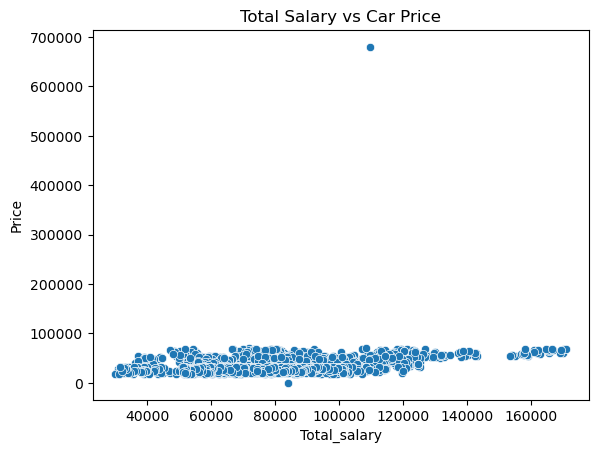

In [62]:
sns.scatterplot(x='Total_salary', y='Price', data=df)
plt.title("Total Salary vs Car Price")
plt.show()

Count plot for Profession

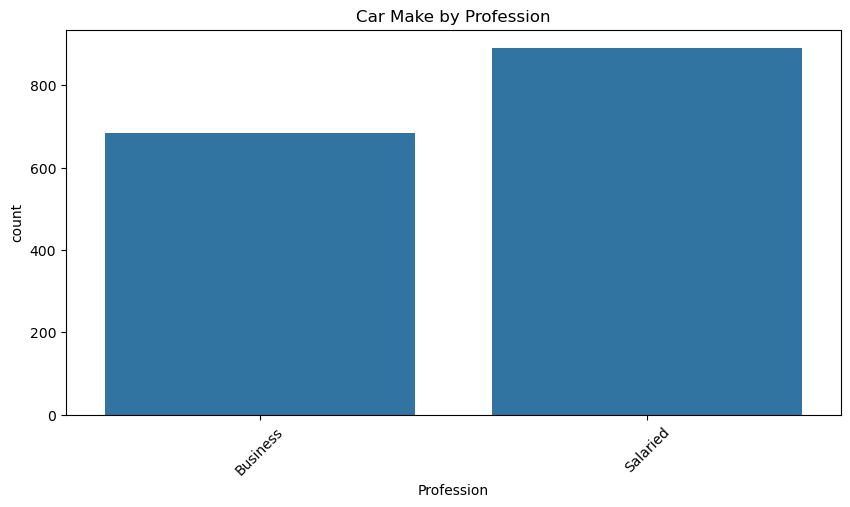

In [63]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Profession', data=df)
plt.title("Car Make by Profession")
plt.xticks(rotation=45)
plt.show()

Outlier Detection

In [64]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
numeric_cols = df.select_dtypes(include=['number']).columns

outliers = df[((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
               (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [65]:
df_no_outliers = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                      (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

Feature Scaling

In [66]:
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

Scatter plot after scaling

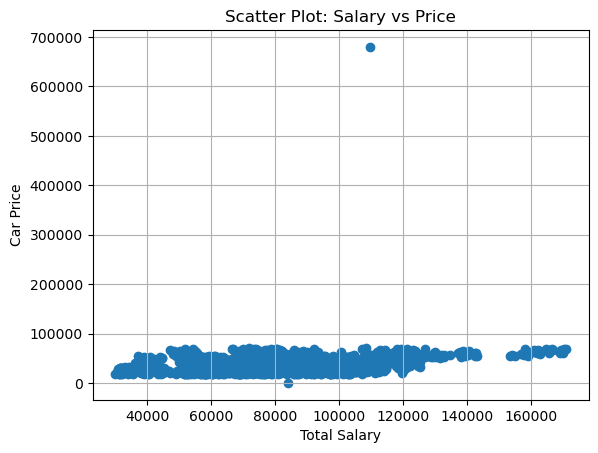

In [67]:
plt.scatter(df['Total_salary'], df['Price'])
plt.xlabel('Total Salary')
plt.ylabel('Car Price')
plt.title('Scatter Plot: Salary vs Price')
plt.grid(True)
plt.show()

Distribution Plots

In [68]:
sns.displot(df['Price'], kde=True, color='green')
plt.title("Distribution of Car Price")
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

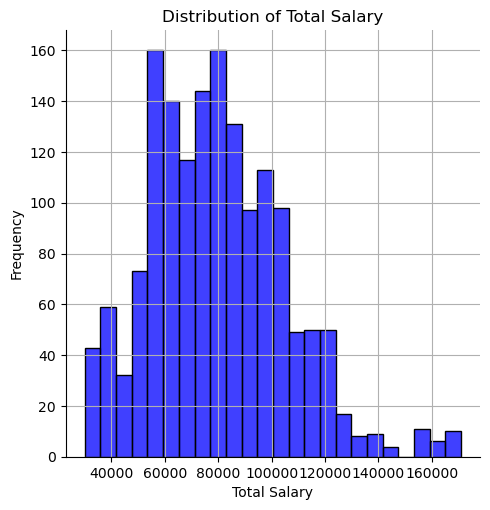

In [49]:
sns.displot(df['Total_salary'], color='blue')
plt.title("Distribution of Total Salary")
plt.xlabel("Total Salary")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Pair Plot

In [69]:
sns.pairplot(df[['Salary', 'Partner_salary', 'Total_salary', 'Price']])
plt.show()

Linear Regression Model

In [97]:
# Separate column types
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [110]:
X = df[['Total_salary']]
y = df[['Price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

Evaluation

In [112]:
print("Model Accuracy(R2):", r2_score(y_test, y_pred)*100)
print('Mean Squared Error:',mean_squared_error(y_test,y_pred)*100)

Model Accuracy(R2): 15.125375829287968
Mean Squared Error: 14683773675.75513


Plot regression line

In [113]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_test, y_pred, 'r', label="Predicted")
plt.title("Regression: Predicted vs Actual")
plt.xlabel("Total Salary")
plt.ylabel("Car Price")
plt.legend()
plt.grid(True)
plt.show()

- Salary vs. Car Price: There’s a weak positive correlation between total salary and car price—suggesting income influences purchasing, but it’s not the whole story.
- Buyer Demographics: Most buyers are salaried professionals, which could guide targeted marketing efforts.
- Data Cleaning: Missing values and categorical data were major obstacles. You resolved these by imputing and encoding, enabling smooth model training.
- Outlier Handling: Filtering outliers improved the dataset’s quality and minimized skew in predictions.
- Model Performance: Your linear regression model had low predictive power (~15% R²), indicating the need for richer feature sets or more advanced models.
